<a href="https://colab.research.google.com/github/ahmedaouadi91/project-2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder,StandardScaler , LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Dataset 1 : Adult income

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/adult.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Deleted unnecessary columns.
* fnlwgt column seem that is unnecessary column and has no affect on income prediction

In [5]:
df1=df1.drop(columns='fnlwgt')

Deleted duplicate rows.

In [6]:
df1.duplicated().sum()

6374

In [7]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

Identified and addressed missing values.

In [8]:
df1.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42468 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              42468 non-null  int64 
 1   workclass        42468 non-null  object
 2   education        42468 non-null  object
 3   educational-num  42468 non-null  int64 
 4   marital-status   42468 non-null  object
 5   occupation       42468 non-null  object
 6   relationship     42468 non-null  object
 7   race             42468 non-null  object
 8   gender           42468 non-null  object
 9   capital-gain     42468 non-null  int64 
 10  capital-loss     42468 non-null  int64 
 11  hours-per-week   42468 non-null  int64 
 12  native-country   42468 non-null  object
 13  income           42468 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


Identified and corrected inconsistencies in data for categorical values

In [10]:
obj_col=df1.select_dtypes('object').columns
obj_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [11]:
df1['workclass'].value_counts()

Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df1['education'].value_counts()

HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64

In [13]:
df1['marital-status'].value_counts()

Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [14]:
df1['occupation'].value_counts()

Prof-specialty       5679
Exec-managerial      5412
Adm-clerical         4813
Sales                4766
Craft-repair         4726
Other-service        4366
Machine-op-inspct    2492
?                    2421
Transport-moving     2071
Handlers-cleaners    1738
Farming-fishing      1434
Tech-support         1351
Protective-serv       944
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
df1['relationship'].value_counts()

Husband           16641
Not-in-family     11384
Own-child          5850
Unmarried          4876
Wife               2242
Other-relative     1475
Name: relationship, dtype: int64

In [16]:
df1['race'].value_counts()

White                 35541
Black                  4536
Asian-Pac-Islander     1515
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [17]:
df1['gender'].value_counts()

Male      27988
Female    14480
Name: gender, dtype: int64

In [18]:
df1['native-country'].value_counts()

United-States                 37492
Mexico                          927
?                               853
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         105
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [19]:
df1['income'].value_counts()

<=50K    32020
>50K     10448
Name: income, dtype: int64

In [20]:
df1=df1.replace('?',np.nan)

In [21]:
df1.isna().sum()

age                   0
workclass          2411
education             0
educational-num       0
marital-status        0
occupation         2421
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      853
income                0
dtype: int64

In [22]:
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39240 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39240 non-null  int64 
 1   workclass        39240 non-null  object
 2   education        39240 non-null  object
 3   educational-num  39240 non-null  int64 
 4   marital-status   39240 non-null  object
 5   occupation       39240 non-null  object
 6   relationship     39240 non-null  object
 7   race             39240 non-null  object
 8   gender           39240 non-null  object
 9   capital-gain     39240 non-null  int64 
 10  capital-loss     39240 non-null  int64 
 11  hours-per-week   39240 non-null  int64 
 12  native-country   39240 non-null  object
 13  income           39240 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.5+ MB


Produced univariate visuals for the target and all features.

In [23]:
def univar_visual(df, x):
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=(8,8))
  # Plotting a count plot
  sns.countplot(data=df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}", fontweight='bold')
  fig.tight_layout()


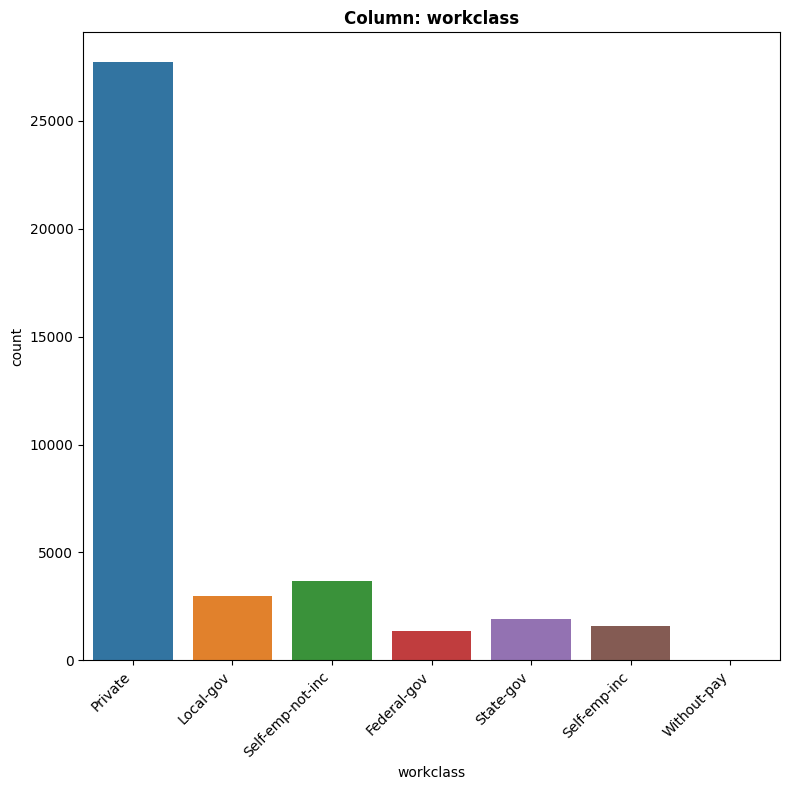

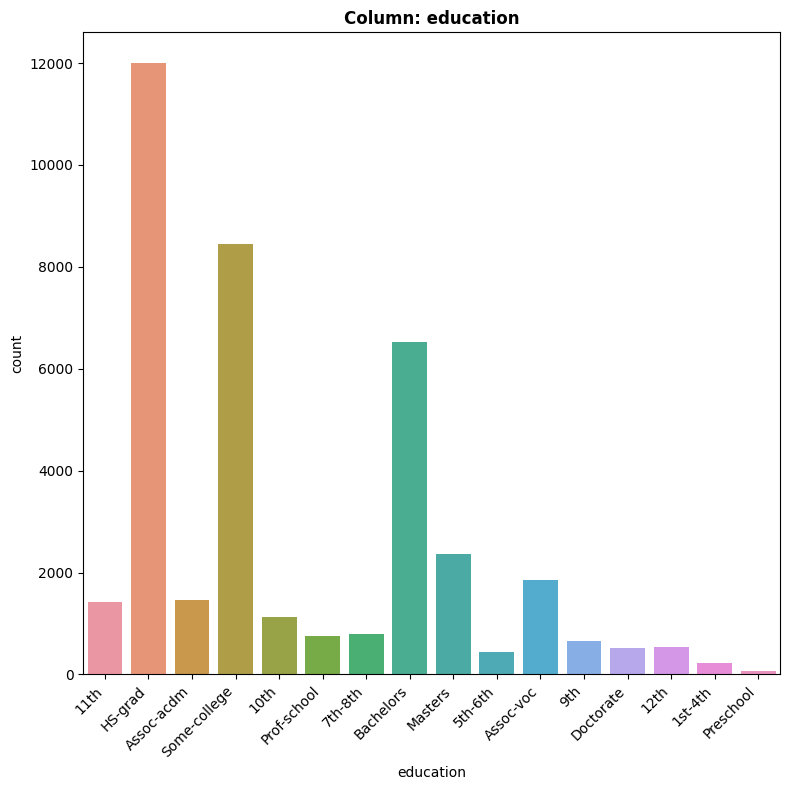

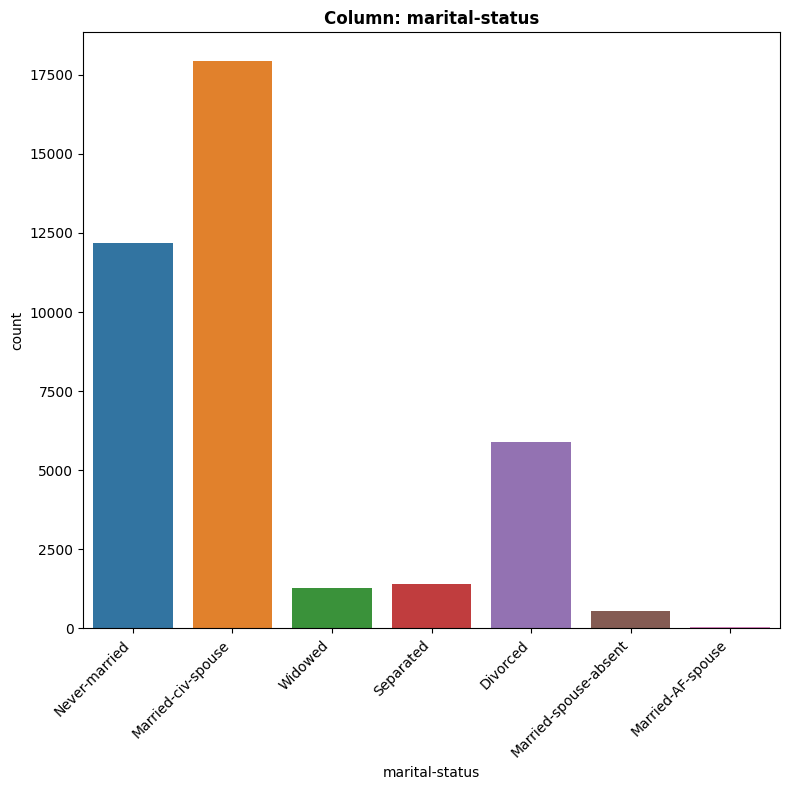

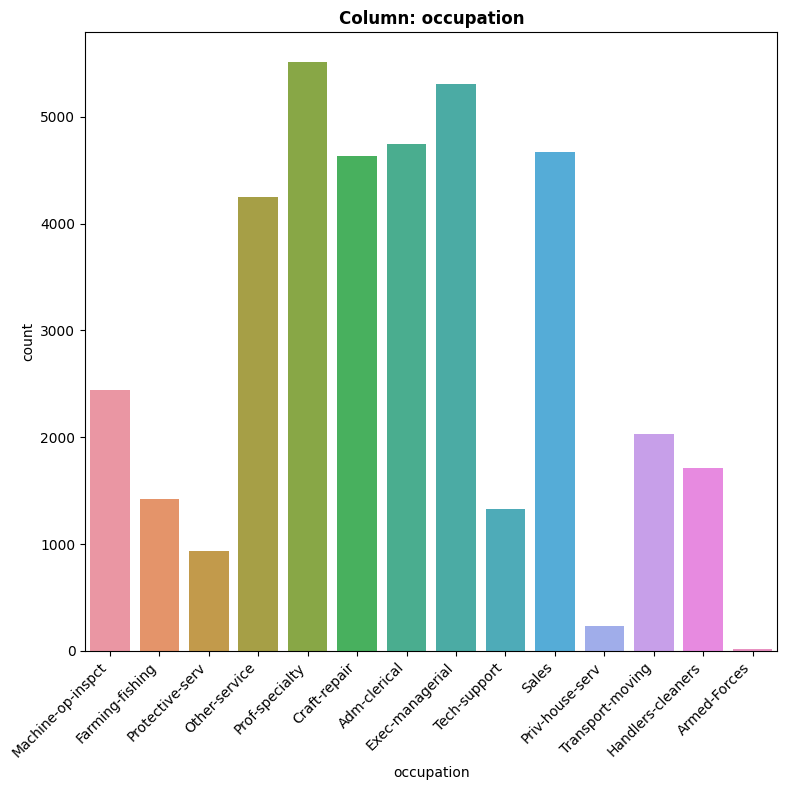

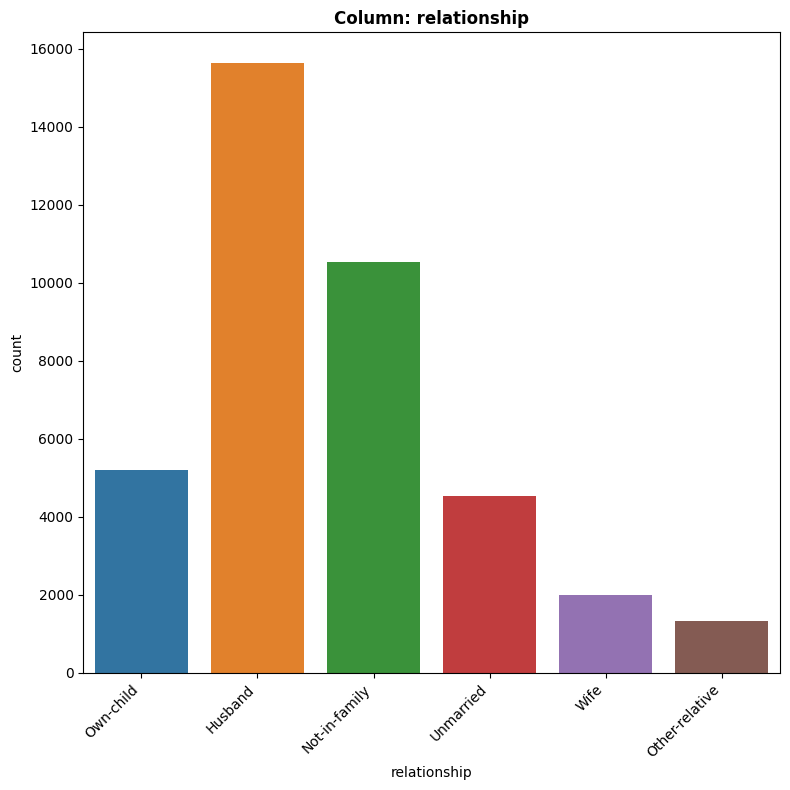

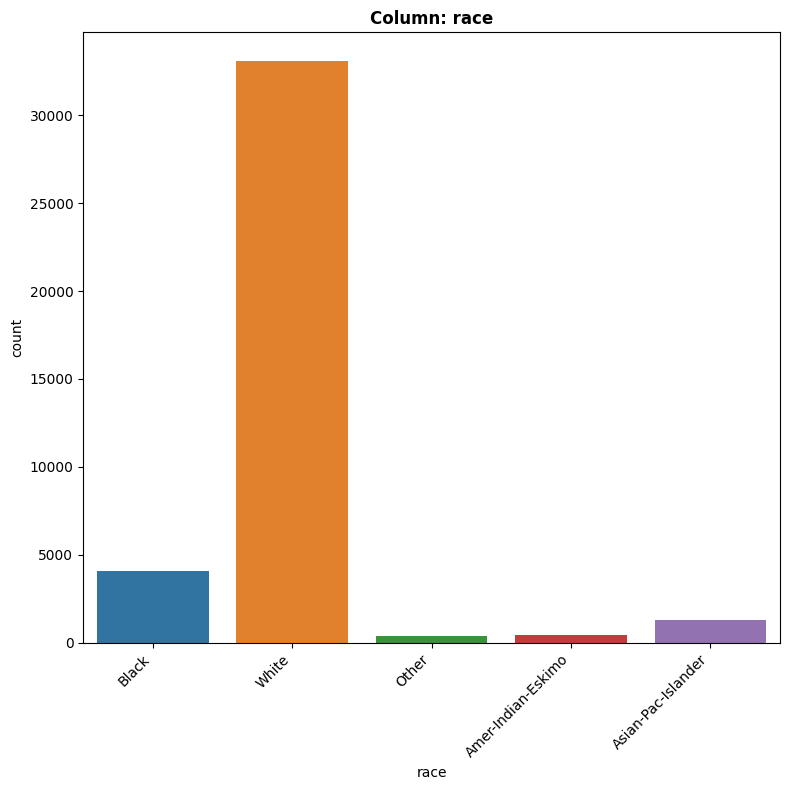

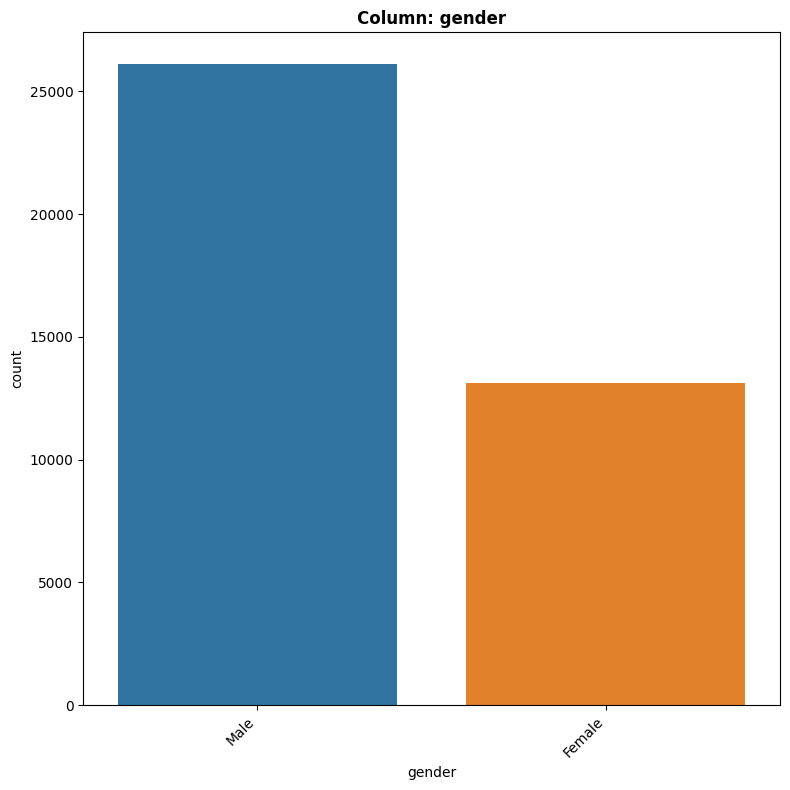

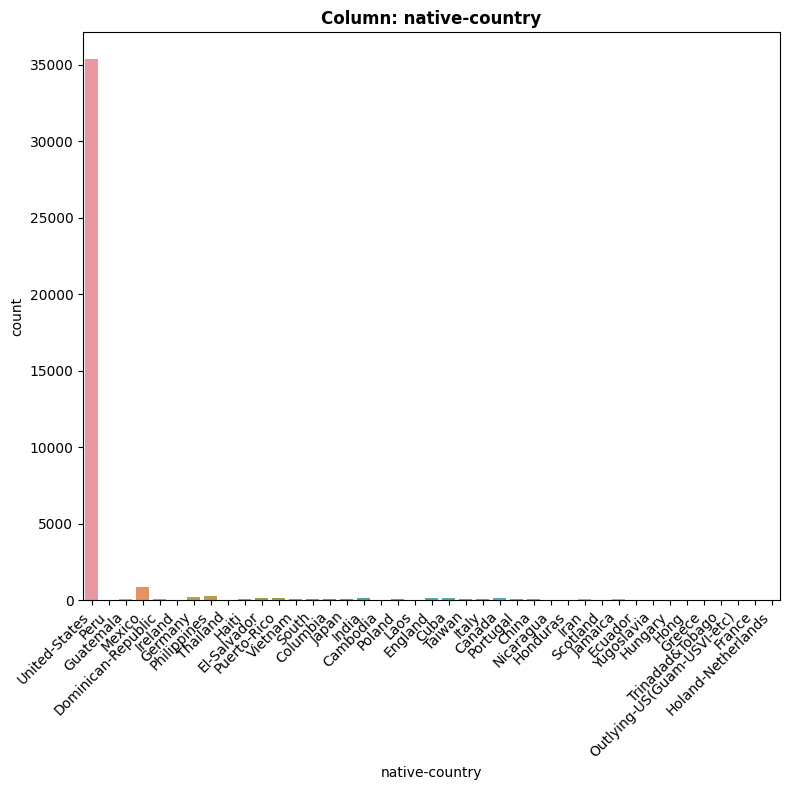

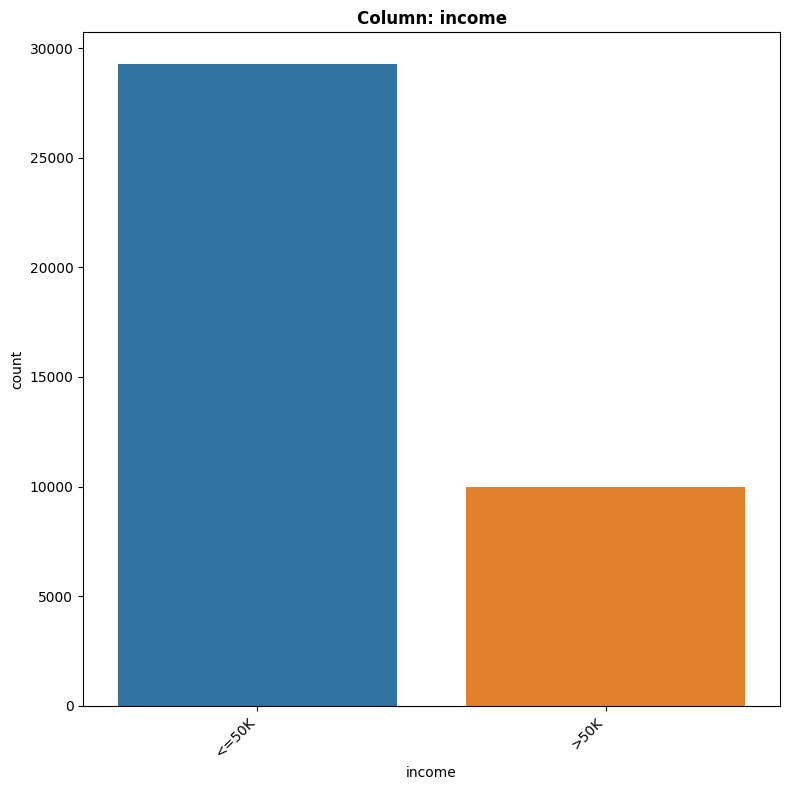

In [24]:
for i, col in enumerate(obj_col[0:]):
  univar_visual(df1,col)

* Identified outliers

In [25]:
num_col=df1.select_dtypes('number').columns
num_col

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [26]:
df1.describe().round(3)

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,39240.000,39240.000,39240.000,39240.000,39240.000
mean,39.309,10.136,1253.314,101.261,41.206
std,13.298,2.637,7993.997,431.434,12.458
min,17.000,1.000,0.000,0.000,1.000
25%,29.000,9.000,0.000,0.000,40.000
50%,38.000,10.000,0.000,0.000,40.000
75%,48.000,13.000,0.000,0.000,45.000
max,90.000,16.000,99999.000,4356.000,99.000


* Clearly commented all of your cleaning steps and described any decisions you made.
 * fnlwgt column seem that is unnecessary column and has no affect on income prediction
 * Data has 6374 duplicated row ,since our data has 48842 rows (we have enough data to prepare the model ) so we drop all duplicated rows
 * We have no missing values but we have a lot of inconsistencies in data for categorical values which is '?' ,so I replace it with 'np.nan' ,Now data has many missing value ,I choose to drop all rows with missing values.after all droping we still have enough data to work on.
 * For data univaiate visualazation I choose to make function (univar_visual) to simpify work ,this function make barplots of all categorical Features in which we can see value counts of each values.

# Part 3

1-1 Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap

<Axes: >

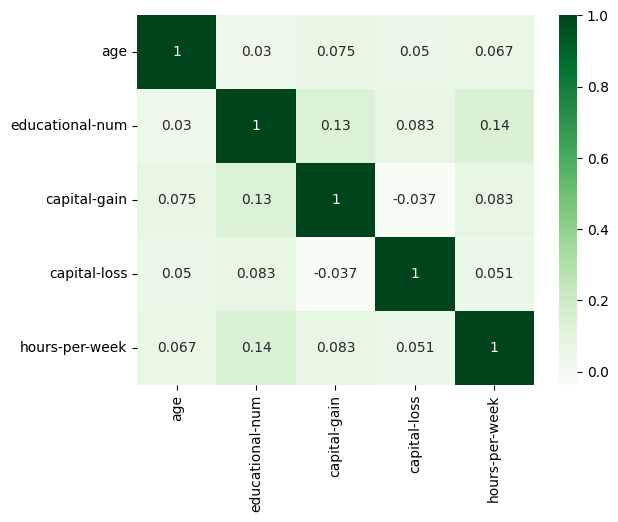

In [27]:
corr1 = df1.corr()
sns.heatmap(corr1, cmap = 'Greens', annot = True)

1-2- Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.

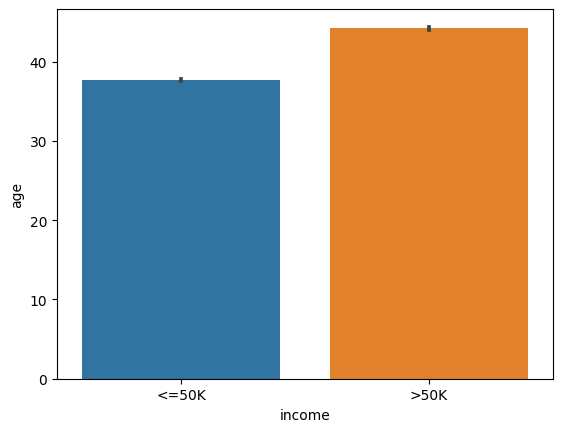

In [28]:
sns.barplot(data=df1, x='income', y="age");

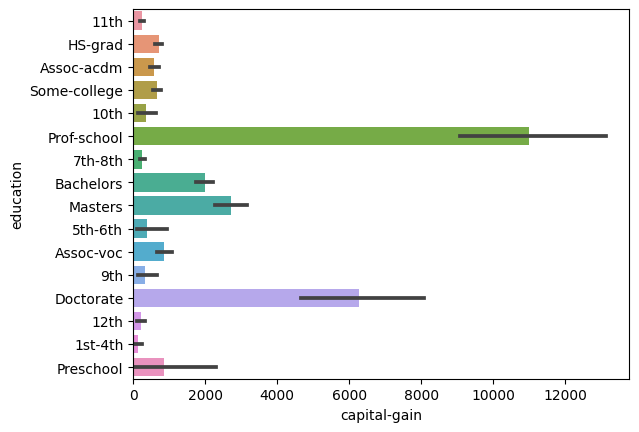

In [29]:
sns.barplot(data=df1, x='capital-gain', y="education");

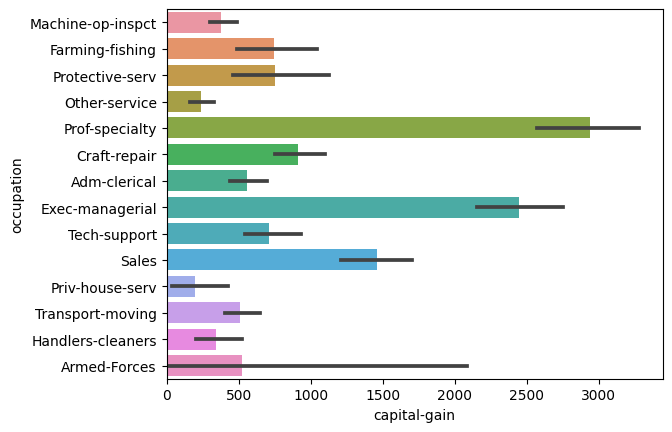

In [30]:
sns.barplot(data=df1, x='capital-gain', y="occupation");

<Axes: xlabel='income', ylabel='capital-gain'>

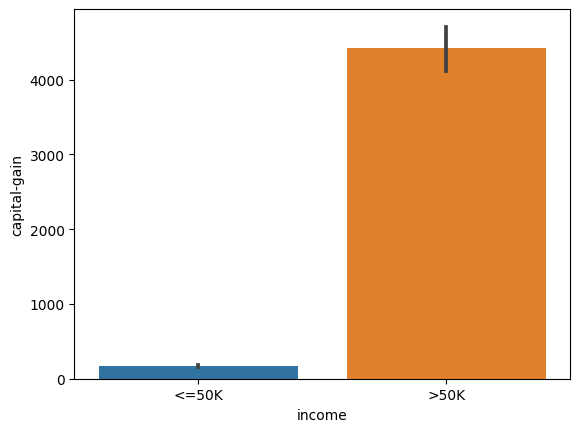

In [31]:
sns.barplot(data=df1, x='income', y="capital-gain")

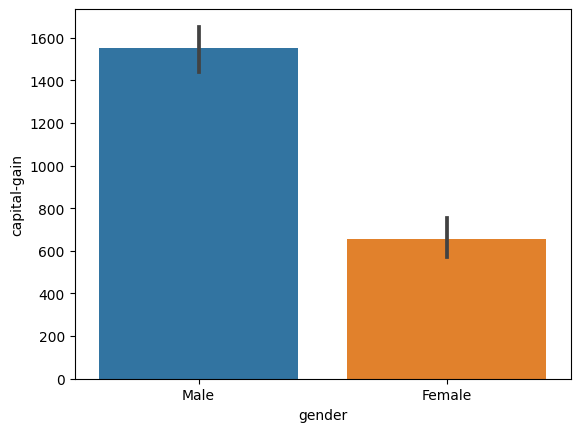

In [32]:
sns.barplot(data=df1, x='gender', y="capital-gain");

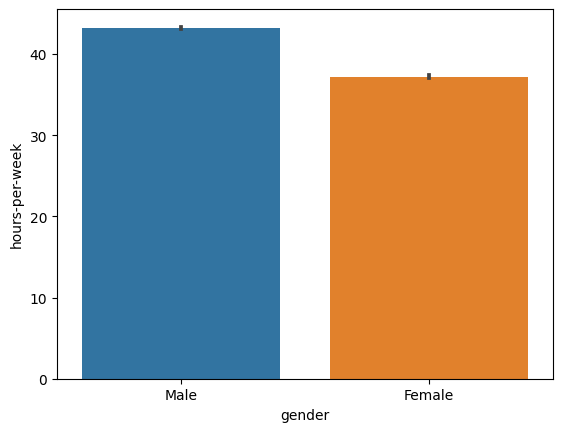

In [33]:
sns.barplot(data=df1, x='gender', y="hours-per-week");

2-choose two visualizations from your analysis that demonstrate key trends.

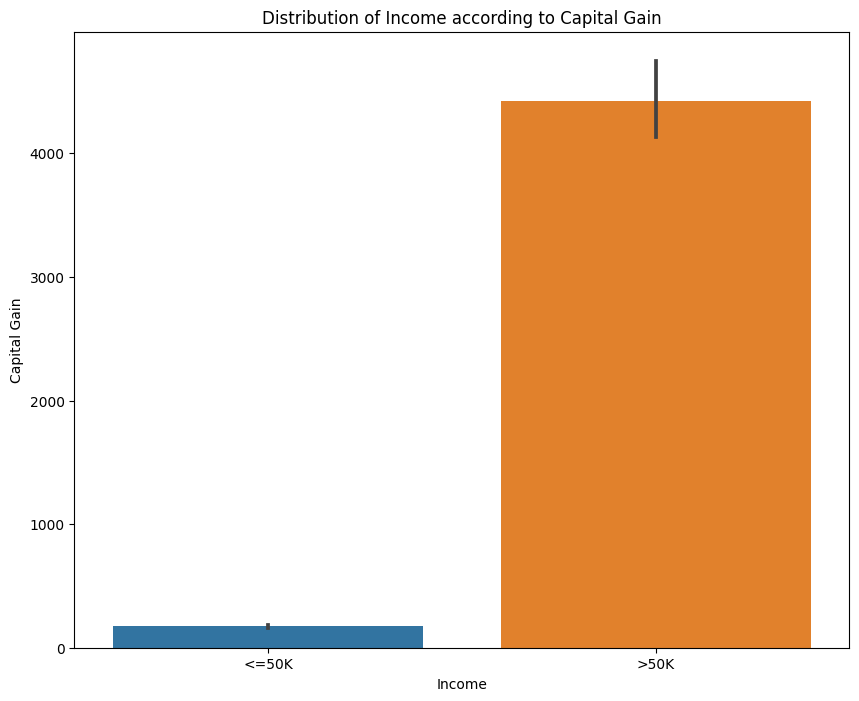

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(data=df1, x='income', y="capital-gain");
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.title('Distribution of Income according to Capital Gain')
plt.show();

the barplot above represents the distribution of income according to capital gain, this barplot shows us a significant difference between the two classes in terms of the value of capital gain (>50K and <=50K)

The higher the capital gain, the higher the income too. So we can conclude that the capital gain is a very important factor in determining income

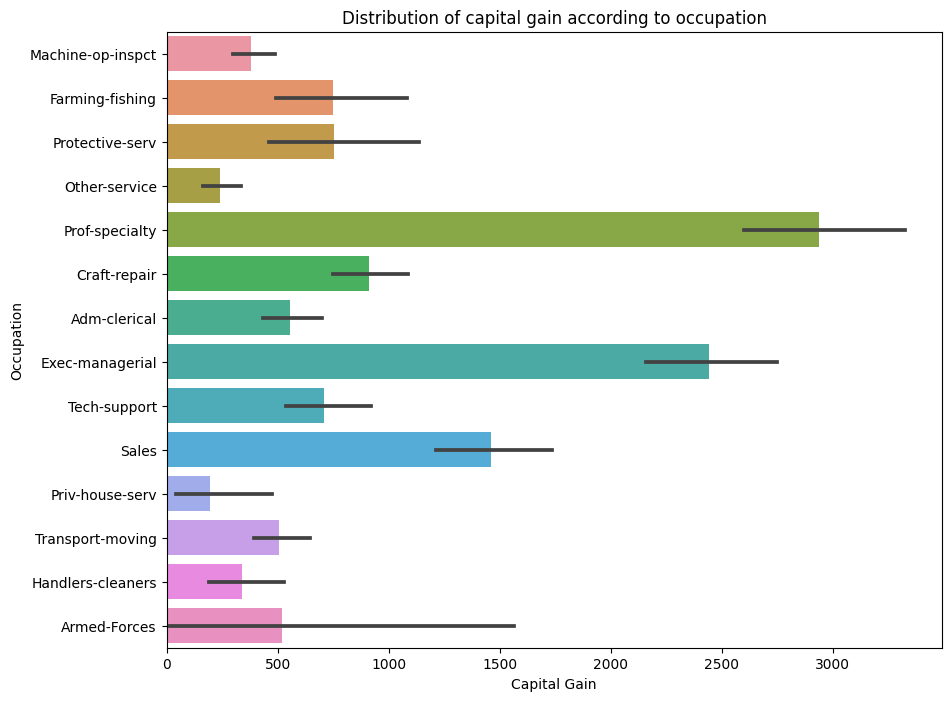

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(data=df1, x='capital-gain', y="occupation");
plt.xlabel('Capital Gain')
plt.ylabel('Occupation')
plt.title('Distribution of capital gain according to occupation')
plt.show();

The bar plot above represents the distribution of capital gain according to occupation. This barplot shows us that certain occupations have a high capital gain such as prof-speciality, exec-managerial and sales occupation while the other occupations have corresponding low capital gain.

Since we have already determined previously that capital gain is an important factor in determining income.We reveal the importance of occupation for determining income

# PART 4

1. Pre Processing

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
df1['income'] = df1['income'].replace({'<=50K':0, '>50K':1})

In [38]:
#Identify the features (X) and target (y)
y = df1['income']
X = df1.drop(columns=['income'])

In [39]:
#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [40]:
# Defining a list of features for both the categorical and the numerical columns

cat_feature = make_column_selector(dtype_include='object')
num_feature = make_column_selector(dtype_include='number')

# Instantiating the Transformers
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

# Making pipelines for each category

pip_cat = make_pipeline(ohe_encoder)
pip_num = make_pipeline(scaler)

# Defining a tuple for each pathway

categorical_tup = ('Categorical', pip_cat, cat_feature)
numerical_tup = ('Numerical', pip_num, num_feature)

# Instantiating the ColumnTransformer

col_transformer = ColumnTransformer([numerical_tup, categorical_tup],remainder='passthrough' , verbose_feature_names_out=False)
col_transformer.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c55813ce800>),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c557ed6e6e0>)],
                  verbose_feature_names_out=False)

In [41]:
# Transform the training data
X_train_proc = col_transformer.transform(X_train)
# Transform the testing data
X_test_proc = col_transformer.transform(X_test)

1) Logistic Regression

Fit The model

In [42]:
# Make an instance of the model
logreg = LogisticRegression()
# Create pipeline
logreg_pipe = make_pipeline(col_transformer, logreg)
# Training the model on the data
logreg_pipe.fit(X_train_proc,y_train)
#prediction
train_preds = logreg_pipe.predict(X_train_proc)
test_preds = logreg_pipe.predict(X_test_proc)

Evaluate The model

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7260
           1       0.75      0.61      0.67      2550

    accuracy                           0.84      9810
   macro avg       0.81      0.77      0.78      9810
weighted avg       0.84      0.84      0.84      9810



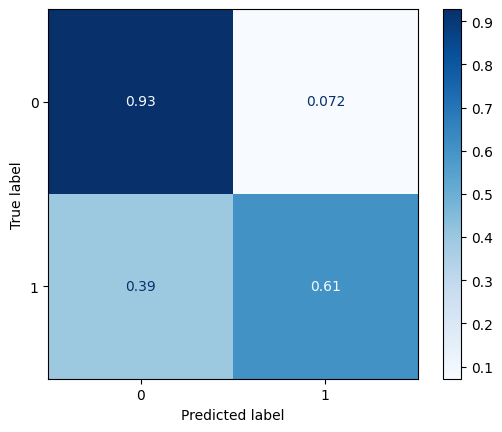

In [43]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test_proc, y_test, cmap = 'Blues',normalize='true');
print(classification_report(y_test, test_preds));

Dealing with imbalanced Data

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7260
           1       0.59      0.84      0.69      2550

    accuracy                           0.81      9810
   macro avg       0.76      0.82      0.78      9810
weighted avg       0.85      0.81      0.82      9810



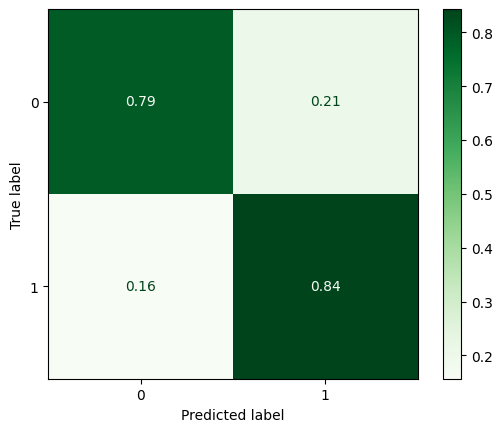

In [44]:
#Instantiate the pipeline with the scaler and weighted model
log_reg_weighted = LogisticRegression(class_weight='balanced')
log_reg_weighted_pipe = make_pipeline(col_transformer, log_reg_weighted)
#Fit and evaluate the model
log_reg_weighted_pipe.fit(X_train_proc, y_train)
train_preds_weighted = log_reg_weighted_pipe.predict(X_train_proc)
test_preds_weighted = log_reg_weighted_pipe.predict(X_test_proc)
print(classification_report(y_test, test_preds_weighted))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_weighted, normalize='true', cmap='Greens');


Use GridSearchCV to tune some of the hyperparameters of the model.

In [45]:
log_reg_weighted.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
model = log_reg_weighted
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2'], 'solver': ['liblinear','saga']},

In [47]:
dt_grid_search = GridSearchCV(model, param_grid)

In [48]:
dt_grid_search.fit(X_train_proc,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid=({'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},))

In [49]:
dt_grid_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [50]:
best_model = dt_grid_search.best_estimator_

In [51]:
logreg_pipe1 = make_pipeline(best_model)

logreg_pipe1.fit(X_train_proc,y_train)
train_pred1 = logreg_pipe1.predict(X_train_proc)
test_pred1 = logreg_pipe1.predict(X_test_proc)

Display the metrics of the best tuned version of the model.

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7260
           1       0.59      0.84      0.69      2550

    accuracy                           0.81      9810
   macro avg       0.76      0.82      0.78      9810
weighted avg       0.85      0.81      0.82      9810



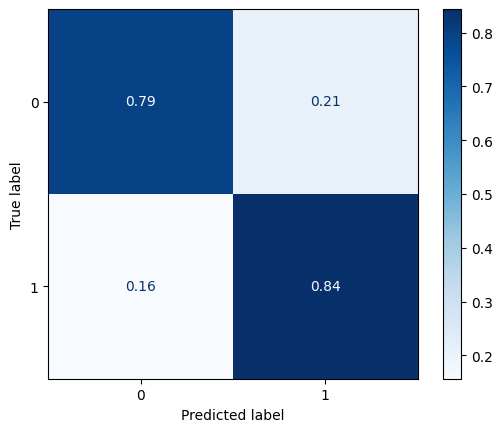

In [52]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test_proc, y_test, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, test_pred1));

2) k-nearest neighbors

Fit The model

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_proc,y_train)

train_predk = knn.predict(X_train_proc)
test_predk = knn.predict(X_test_proc)

Evaluate the model

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7260
           1       0.57      0.56      0.57      2550

    accuracy                           0.78      9810
   macro avg       0.71      0.71      0.71      9810
weighted avg       0.78      0.78      0.78      9810



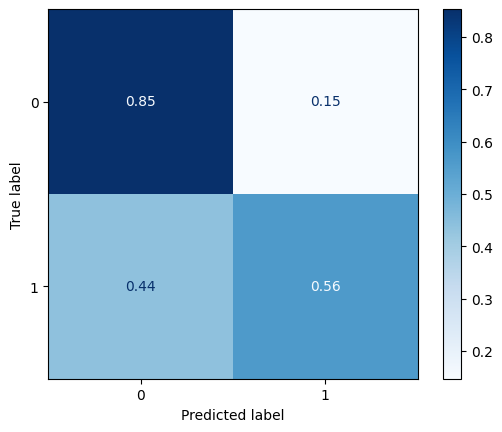

In [54]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_proc, y_test, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, test_predk));

Dealing with imbalanced data

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7260
           1       0.55      0.61      0.58      2550

    accuracy                           0.77      9810
   macro avg       0.70      0.72      0.71      9810
weighted avg       0.78      0.77      0.77      9810



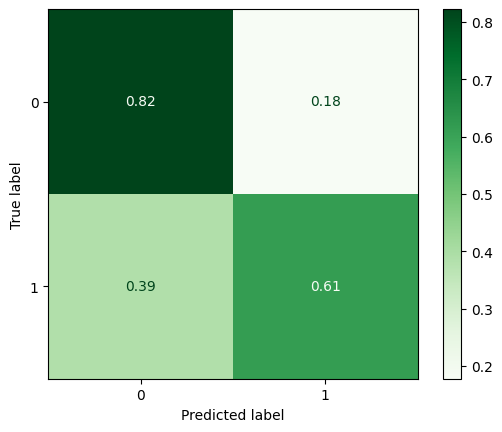

In [55]:
#Create model pipeline with scaler, SMOTE, and model
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
smote = SMOTE()
knn_smote = KNeighborsClassifier(n_neighbors=1)
knn_smote_pipe = make_sampler_pipeline(col_transformer, smote, knn_smote)
#Fit and evaluate the model pipeline
knn_smote_pipe.fit(X_train, y_train)
test_preds_smote_k = knn_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds_smote_k))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_smote_k,normalize='true',cmap='Greens');

Use GridSearchCV to tune some of the hyperparameters of the model

In [56]:
modelk = knn_smote
param_grid = {'n_neighbors': [3,5,6,7,8,10], 'weights':['uniform', 'distance'], 'leaf_size': [2,3,4,5,10]},

In [57]:
dt_grid_search = GridSearchCV(modelk, param_grid)

In [58]:
dt_grid_search.fit(X_train_proc, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid=({'leaf_size': [2, 3, 4, 5, 10],
                          'n_neighbors': [3, 5, 6, 7, 8, 10],
                          'weights': ['uniform', 'distance']},))

In [59]:
dt_grid_search.best_params_

{'leaf_size': 2, 'n_neighbors': 10, 'weights': 'uniform'}

Best model evalution

In [60]:
best_model_knn = dt_grid_search.best_estimator_

In [61]:
knn_pipe = make_pipeline(best_model_knn)

knn_pipe.fit(X_train_proc,y_train)

train_predkt = knn_pipe.predict(X_train_proc)
test_predkt = knn_pipe.predict(X_test_proc)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7260
           1       0.72      0.55      0.62      2550

    accuracy                           0.83      9810
   macro avg       0.79      0.74      0.76      9810
weighted avg       0.82      0.83      0.82      9810



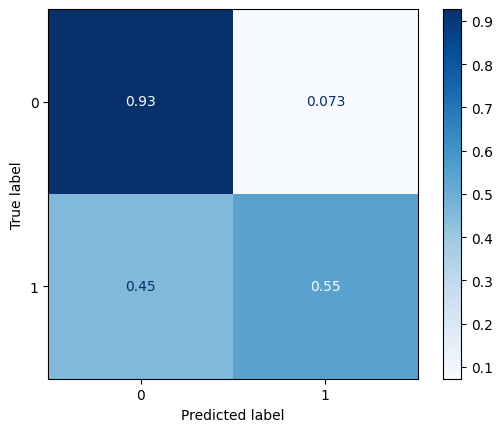

In [62]:
ConfusionMatrixDisplay.from_estimator(best_model_knn, X_test_proc, y_test, cmap = 'Blues', normalize="true");
print(classification_report(y_test, test_predkt));

3. Random forest

Fit The model

In [63]:
rfc = RandomForestClassifier(random_state = 42)

In [64]:
rfc.fit(X_train_proc, y_train)

RandomForestClassifier(random_state=42)

In [65]:
train_predrfc = rfc.predict(X_train_proc)
test_predrfc = rfc.predict(X_test_proc)

Evaluate The model

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7260
           1       0.68      0.59      0.63      2550

    accuracy                           0.82      9810
   macro avg       0.77      0.75      0.76      9810
weighted avg       0.82      0.82      0.82      9810



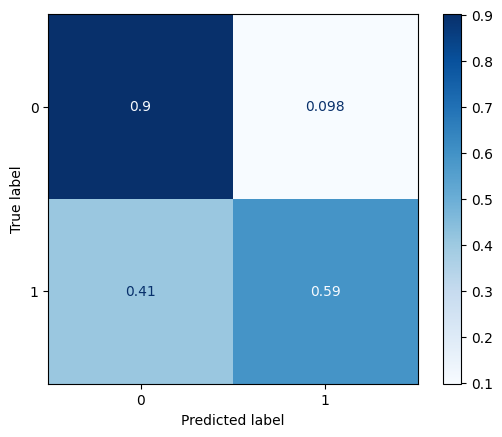

In [66]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test_proc, y_test, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, test_predrfc));

Dealing with imbalanced data

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7260
           1       0.64      0.65      0.65      2550

    accuracy                           0.81      9810
   macro avg       0.76      0.76      0.76      9810
weighted avg       0.82      0.81      0.81      9810



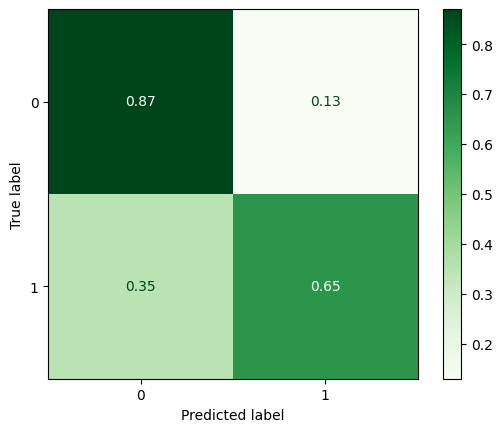

In [67]:
#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
rfc_smote = RandomForestClassifier(random_state = 42)
rfc_smote_pipe = make_sampler_pipeline(col_transformer, smote, rfc_smote)
#Fit and evaluate the model pipeline
rfc_smote_pipe.fit(X_train, y_train)
test_preds_smote_rfc = rfc_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds_smote_rfc))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_smote_rfc,normalize='true',cmap='Greens');

Use GridSearchCV to tune some of the hyperparameters of the model

In [68]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [69]:
modelrfc = rfc_smote
param_grid = {'n_estimators': [10,20,30,50,70,80,90,100],'class_weight' : ['balanced', 'balanced_subsample'] ,'max_depth': [5,10,50,80,100,150]},

In [70]:
dt_grid_search = GridSearchCV(modelrfc, param_grid)

In [71]:
dt_grid_search.fit(X_train_proc, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=({'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [5, 10, 50, 80, 100, 150],
                          'n_estimators': [10, 20, 30, 50, 70, 80, 90, 100]},))

In [72]:
dt_grid_search.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 50, 'n_estimators': 70}

In [73]:
best_model_rfc = dt_grid_search.best_estimator_

In [74]:
rfc_pipe = make_pipeline(best_model_rfc)

rfc_pipe.fit(X_train_proc,y_train)

train_predrfct = rfc_pipe.predict(X_train_proc)
test_predrfct = rfc_pipe.predict(X_test_proc)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7260
           1       0.67      0.60      0.63      2550

    accuracy                           0.82      9810
   macro avg       0.77      0.75      0.76      9810
weighted avg       0.81      0.82      0.82      9810



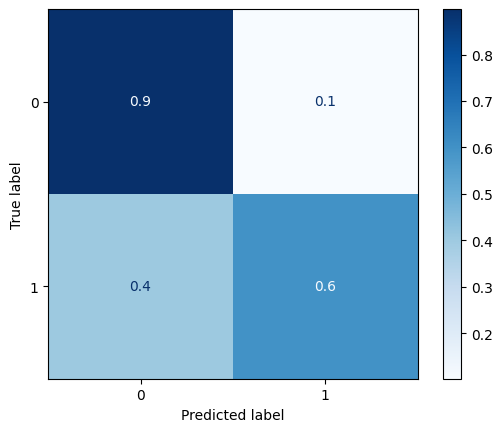

In [75]:
ConfusionMatrixDisplay.from_estimator(best_model_rfc, X_test_proc, y_test, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, test_predrfct));

* basic Logistic Regression is the best model ,its accuracy is the best for all the other model 0.84
* metrics recall and precision are important in this case. A higher recall means fewer false negative predictions, also known as type 2 errors, recall for basic logistic regression is 0.93

Data Engineering

In [128]:
from sklearn.decomposition import PCA

In [132]:
# Instantiate & fit data using PCA
scaled_df = scaler.fit_transform(X)
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

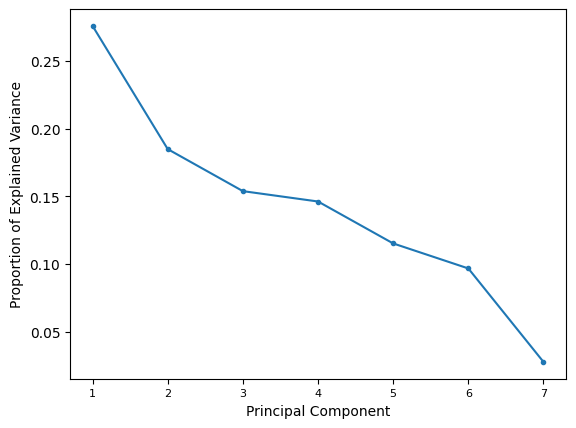

In [135]:
# Plot the explained variance ratios of the first 7 principal components
plt.plot(range(1, 8), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 8), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')


The "elbow" or inflection point on the graph above can be seen around 6 principal components. This is where we don't get much benefit from further increasing the number of components, so it represents a good balance.

In [136]:
# PCA with 6 components
pca6 = PCA(n_components=6)


In [137]:
# Create a transformer pipeline
transformer = make_pipeline(col_transformer, pca6)

In [138]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('Numerical',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7c55813ce800>),
                                                                  ('Categorical',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7c557ed6e6e0>)],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=6))])),
                ('logisticregression', LogisticRegression())])

In [139]:
preds_pca = logreg_pipe.predict(X_test)
print(classification_report(y_test, preds_pca))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7260
           1       0.72      0.54      0.62      2550

    accuracy                           0.83      9810
   macro avg       0.79      0.73      0.75      9810
weighted avg       0.82      0.83      0.82      9810



The PCA model is faster and give us faster prediction but weaker accuracy and lower precision .so The best production model will be Base logistic regression  

# Dataset 2 : Crop Recommendation

In [77]:
df2 = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Deleted unnecessary columns.
* No unnecessary columns

Deleted duplicate rows

In [78]:
df2.duplicated().sum()

0

Identified and addressed missing values.

In [79]:
df2.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [80]:
df2['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Produced univariate visuals for the target and all features.

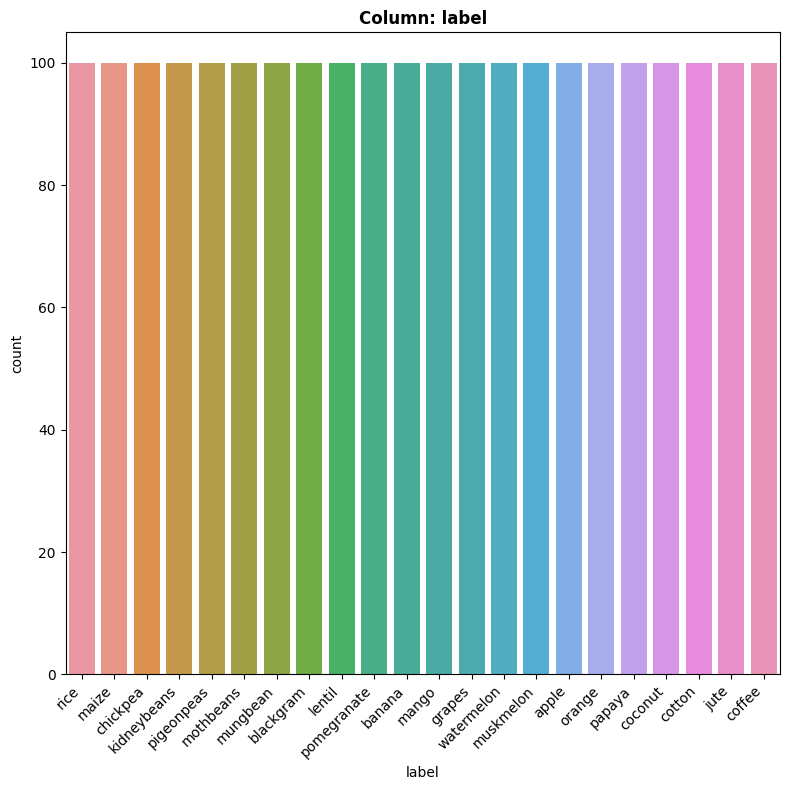

In [81]:
univar_visual(df2,'label')

Identified outliers

In [82]:
df2.describe().round(3)

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


Clearly commented all of your cleaning steps and described any decisions you made.
* Data is already prepared and do not need any Cleaning,no unnecessary columns ,no duplicated rows,no missing values ,no inconsistencies and Identified outliers.
* Target barplot show that data is pretty balanced (100 sample of each label)

# Part 3

1-1 Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap

<Axes: >

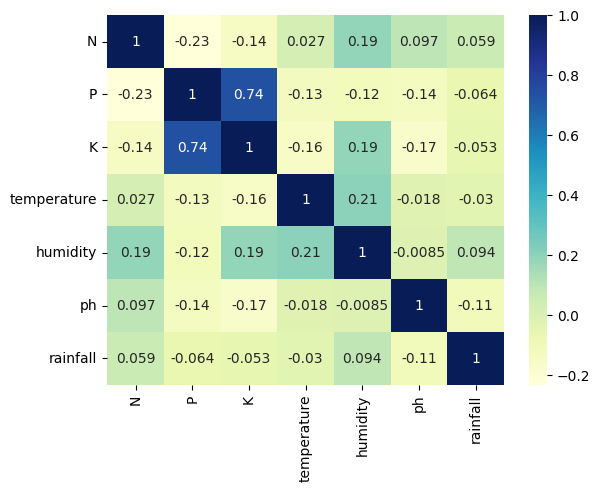

In [83]:
corr2 = df2.corr()
sns.heatmap(corr2, cmap = 'YlGnBu', annot = True)

1-2- Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends

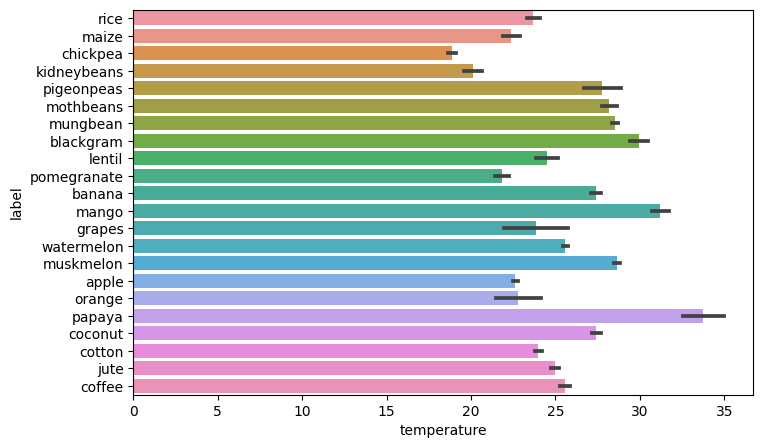

In [84]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df2, x='temperature', y="label");

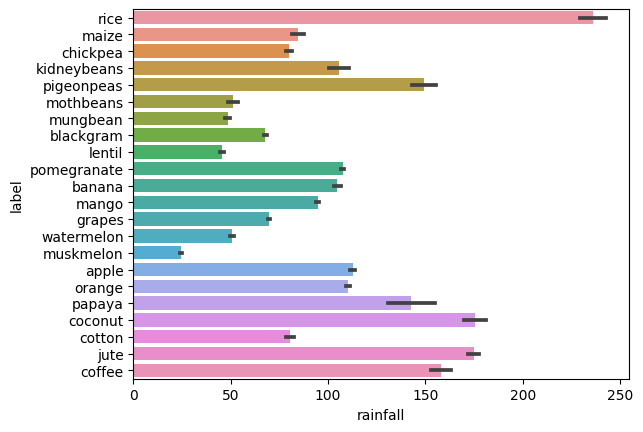

In [85]:
sns.barplot(data=df2, x='rainfall', y="label");

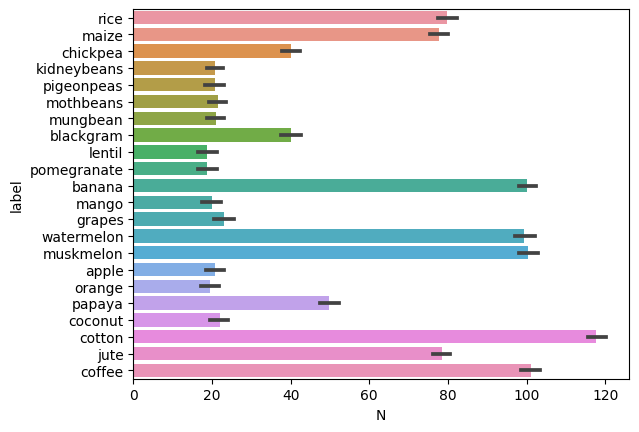

In [86]:
sns.barplot(data=df2, x='N', y="label");

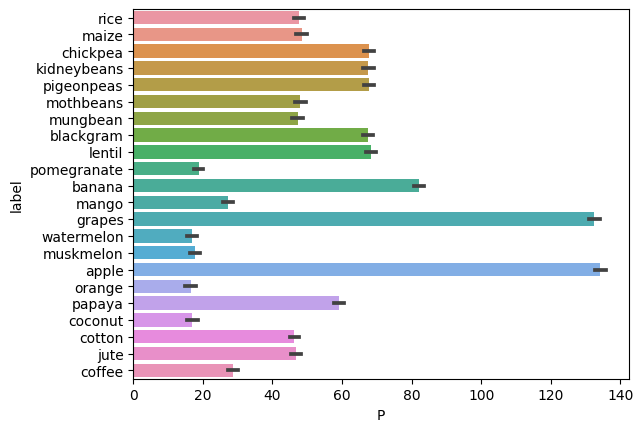

In [87]:
sns.barplot(data=df2, x='P', y="label");

2-choose two visualizations from your analysis that demonstrate key trends.

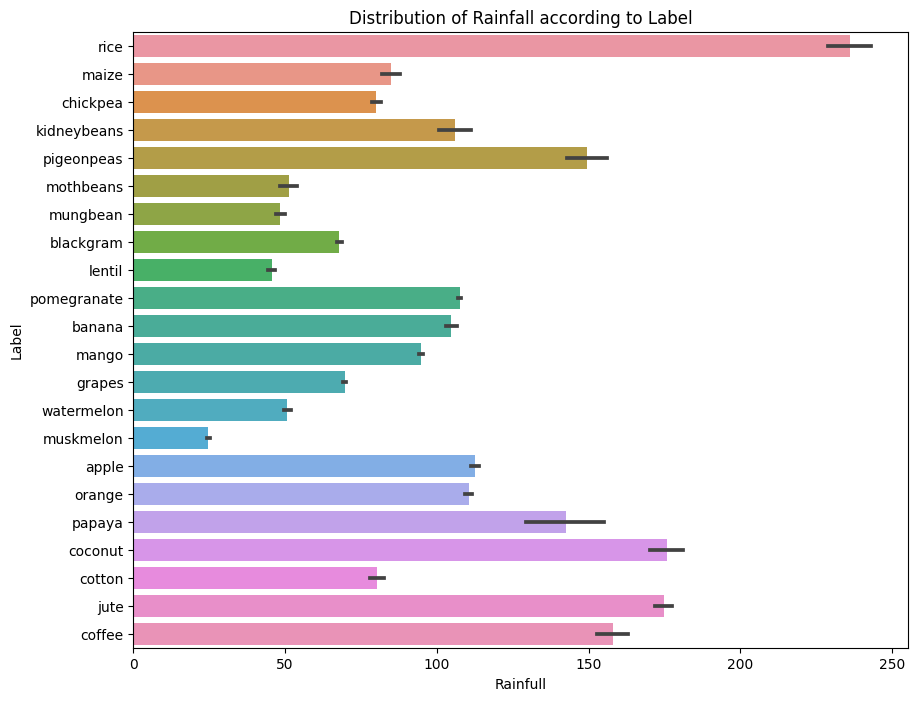

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(data=df2, x='rainfall', y="label");
plt.xlabel('Rainfull')
plt.ylabel('Label')
plt.title('Distribution of Rainfall according to Label')
plt.show();

knowing the needs of the crops and the reserves of the soil is very important for the success of the crop and to guarantee an excellent yield and subsequently economic profitability
we will discuss two main factors for plant production which are water(rainfall)and nitrogen (N)

The bar plot above represents the distribution of rainfall according to Labes. in other words the variation in water needs depending on labels.
This barplot shows us that certain label need a high water quantity (water demanding plants) such as rice, coconut and jute while the other label have moderate to low water need.

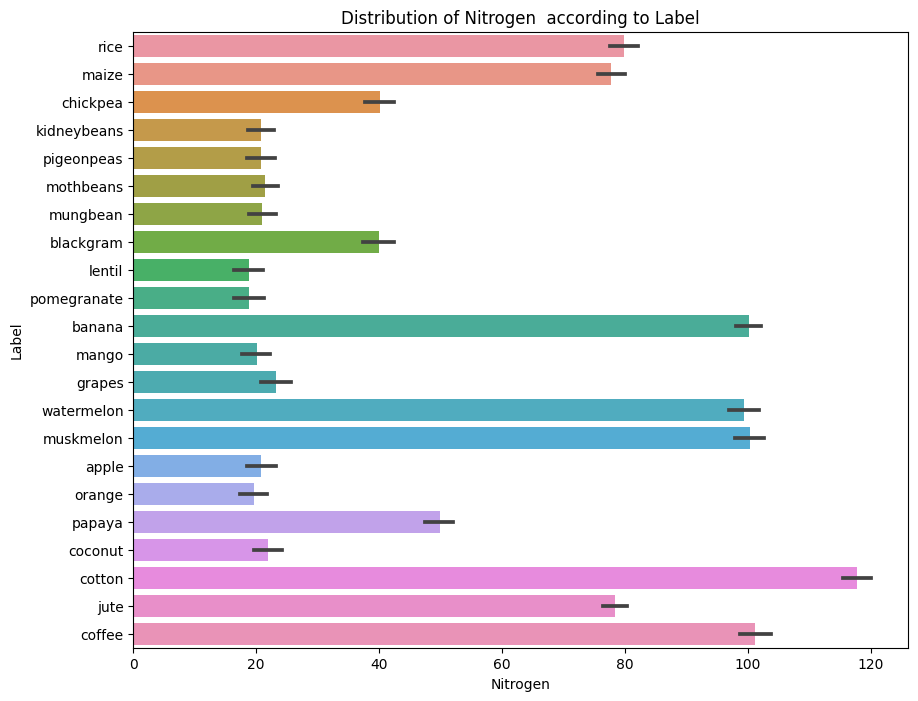

In [89]:
plt.figure(figsize=(10,8))
sns.barplot(data=df2, x='N', y="label");
plt.xlabel('Nitrogen')
plt.ylabel('Label')
plt.title('Distribution of Nitrogen  according to Label')
plt.show();

Nitrogen is an essential element for plant growth and production.The bar plot above represents the distribution of nitrogen according to Labes. in other words the variation in nitrogen needs depending on labels.
This barplot shows us that certain label need a high nitrogen quantity such as rice,maize,banana,watermelon,muskmelon and cotton while the other label have low nitrogen need.

# PART 4

Pre Processing

In [140]:
#Identify the features (X) and target (y)
le = LabelEncoder()
y1 = le.fit_transform(df2['label'])
X1 = df2.drop(columns=['label'])

In [141]:
#Perform a train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,random_state=42)

1. Logistic Regression

In [92]:
# Make an instance of the model
logreg = LogisticRegression()
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data
logreg_pipe.fit(X_train1,y_train1)
#prediction
train_preds1 = logreg.predict(X_train1)
test_preds1 = logreg.predict(X_test1)

              precision    recall  f1-score   support

           0       0.36      1.00      0.53        29
           1       0.40      0.26      0.32        23
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        22
          16       0.00      0.00      0.00        19
          17       0.09    

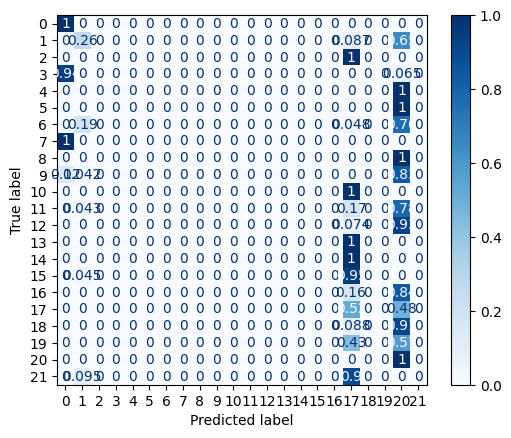

In [93]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test1, y_test1, cmap = 'Blues',normalize='true');
print(classification_report(y_test1, test_preds1));

In [94]:
modelreg1 = LogisticRegression()
param_grid = {'C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'penalty':['l1', 'l2','elasticnet'],'solver': ['liblinear','saga']},

In [95]:
dt_grid_search = GridSearchCV(modelreg1, param_grid)

In [96]:
dt_grid_search.fit(X_train1, y_train1)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=({'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['liblinear', 'saga']},))

In [97]:
dt_grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Best model evalution

In [98]:
best_model = dt_grid_search.best_estimator_

In [99]:
logreg_pipe2 = make_pipeline(best_model)

logreg_pipe2.fit(X_train1,y_train1)
train_pred2 = logreg_pipe2.predict(X_train1)
test_pred2 = logreg_pipe2.predict(X_test1)

 Evaluation both the default and the tuned versions using appropriate metrics and a confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       0.88      0.92      0.90        24
           3       1.00      1.00      1.00        31
           4       0.96      0.96      0.96        27
           5       0.96      1.00      0.98        26
           6       0.91      1.00      0.95        21
           7       1.00      1.00      1.00        19
           8       0.76      0.81      0.79        27
           9       0.96      1.00      0.98        24
          10       0.88      1.00      0.94        15
          11       0.95      0.91      0.93        23
          12       1.00      1.00      1.00        27
          13       0.96      0.96      0.96        26
          14       1.00      0.96      0.98        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       0.94    

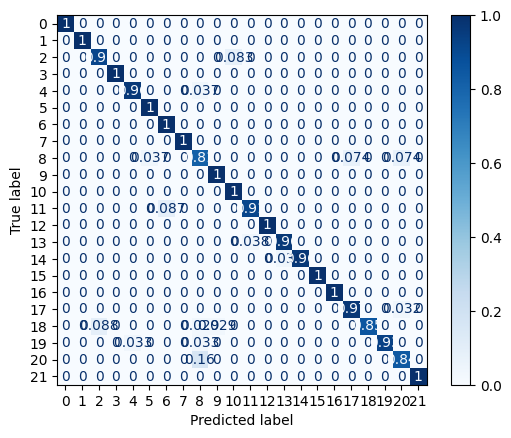

In [100]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test1, y_test1, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test1, test_pred2));

2. k-nearest neighbors

In [101]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train1,y_train1)

train_predk1 = knn1.predict(X_train1)
test_predk1 = knn1.predict(X_test1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       0.96      0.96      0.96        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      0.96      0.98        26
           6       0.95      0.95      0.95        21
           7       1.00      1.00      1.00        19
           8       0.73      0.89      0.80        27
           9       0.96      1.00      0.98        24
          10       0.83      1.00      0.91        15
          11       0.96      0.96      0.96        23
          12       1.00      1.00      1.00        27
          13       0.96      0.88      0.92        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

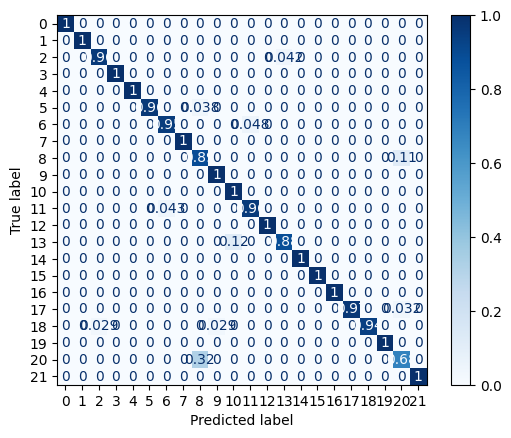

In [102]:
ConfusionMatrixDisplay.from_estimator(knn1, X_test1, y_test1, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test1, test_predk1));

Use GridSearchCV to tune the model

In [103]:
modelk1 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,6,7,8,10], 'weights':['uniform', 'distance'], 'leaf_size': [2,3,4,5,10]},

In [104]:
dt_grid_search = GridSearchCV(modelk1, param_grid)

In [105]:
dt_grid_search.fit(X_train1, y_train1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=({'leaf_size': [2, 3, 4, 5, 10],
                          'n_neighbors': [3, 5, 6, 7, 8, 10],
                          'weights': ['uniform', 'distance']},))

In [106]:
dt_grid_search.best_params_

{'leaf_size': 2, 'n_neighbors': 6, 'weights': 'distance'}

Best model evalution

In [107]:
best_model_knn = dt_grid_search.best_estimator_

In [108]:
knn_pipe1 = make_pipeline(best_model_knn)

knn_pipe1.fit(X_train1,y_train1)

train_predk2 = knn_pipe1.predict(X_train1)
test_predk2 = knn_pipe1.predict(X_test1)

Evaluation both the default and the tuned versions using appropriate metrics and a confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      0.96      0.98        26
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00        19
           8       0.72      0.96      0.83        27
           9       0.96      1.00      0.98        24
          10       0.88      1.00      0.94        15
          11       1.00      0.96      0.98        23
          12       1.00      1.00      1.00        27
          13       1.00      0.92      0.96        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

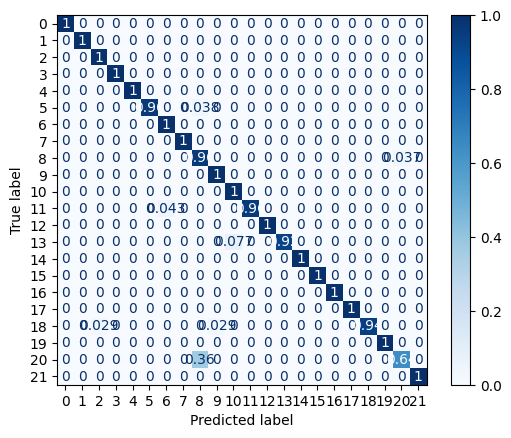

In [109]:
ConfusionMatrixDisplay.from_estimator(best_model_knn, X_test1, y_test1, cmap = 'Blues', normalize="true");
print(classification_report(y_test1, test_predk2));

3. Random forest

In [110]:
rfc1 = RandomForestClassifier(random_state = 42)

In [111]:
rfc1.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [112]:
train_predrfc1 = rfc1.predict(X_train1)
test_predrfc1 = rfc1.predict(X_test1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        19
           8       0.84      1.00      0.92        27
           9       1.00      1.00      1.00        24
          10       0.94      1.00      0.97        15
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       1.00      0.96      0.98        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

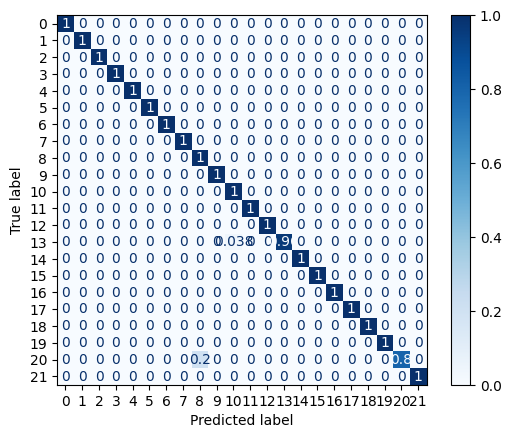

In [113]:
ConfusionMatrixDisplay.from_estimator(rfc1, X_test1, y_test1, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test1, test_predrfc1));

Use GridSearchCV to tune the model.

In [114]:
rfc1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [115]:
modelrfc1 = RandomForestClassifier()
param_grid = {'n_estimators': [10,20,30,50,70,80,90,100],'class_weight' : ['balanced', 'balanced_subsample'] ,'max_depth': [5,10,50,80,100,150]},

In [116]:
dt_grid_search = GridSearchCV(modelrfc1, param_grid)

In [117]:
dt_grid_search.fit(X_train1, y_train1)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=({'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [5, 10, 50, 80, 100, 150],
                          'n_estimators': [10, 20, 30, 50, 70, 80, 90, 100]},))

In [118]:
dt_grid_search.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 50, 'n_estimators': 70}

Best model evalution

In [119]:
best_model_rfc1 = dt_grid_search.best_estimator_

In [120]:
rfc_pipe1 = make_pipeline(best_model_rfc1)

rfc_pipe1.fit(X_train1,y_train1)

train_predrfct1 = rfc_pipe1.predict(X_train1)
test_predrfct1 = rfc_pipe1.predict(X_test1)

Evaluation both the default and the tuned versions using appropriate metrics and a confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        19
           8       0.84      1.00      0.92        27
           9       1.00      1.00      1.00        24
          10       0.94      1.00      0.97        15
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       1.00      0.96      0.98        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

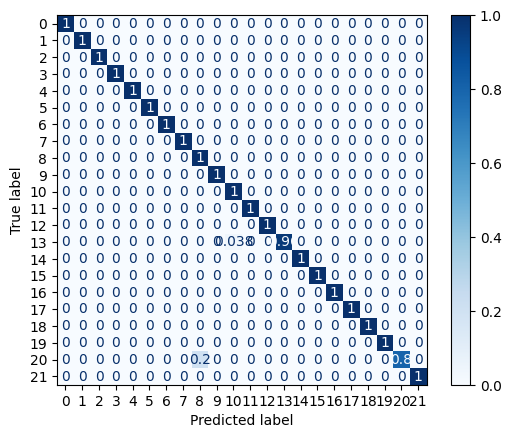

In [121]:
ConfusionMatrixDisplay.from_estimator(best_model_rfc1, X_test1, y_test1, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test1, test_predrfct1));

The best Model is random forest tunned because of his metrics are perfect compared to other models
* Accuracy is 0.99
* precision is 1 for all labels except 2 labels
* recall is also higher for all labels

data engineering

In [146]:
# Instantiate & fit data using PCA
scaled_df2 = scaler.fit_transform(X1)
pca1 = PCA()
pca1.fit(scaled_df2)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

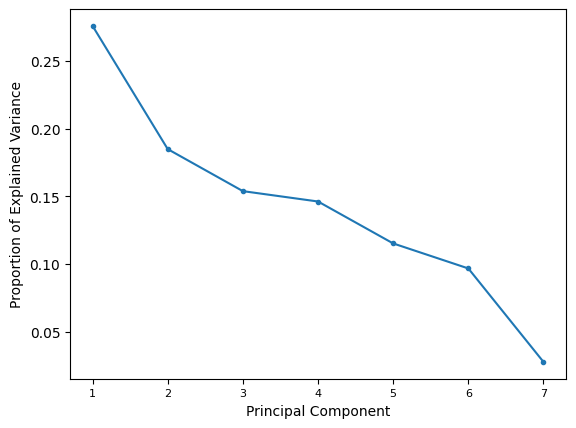

In [147]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 8), pca1.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 8), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')


In [149]:
# PCA with 6 components
pca62 = PCA(n_components=6)


In [154]:
# Create a transformer pipeline
transformer1 = make_pipeline(scaler, pca62)

In [155]:
# Create a modeling pipeline
rfc_pca_pipe = make_pipeline(transformer1, rfc1)
rfc_pca_pipe.fit(X_train1, y_train1)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=6))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [157]:
preds_pca_rfc = rfc_pca_pipe.predict(X_test1)
print(classification_report(y_test1, preds_pca_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       0.96      0.92      0.94        24
           3       1.00      0.97      0.98        31
           4       0.96      1.00      0.98        27
           5       1.00      0.85      0.92        26
           6       0.88      1.00      0.93        21
           7       1.00      1.00      1.00        19
           8       0.70      0.96      0.81        27
           9       0.89      1.00      0.94        24
          10       0.75      1.00      0.86        15
          11       0.96      0.96      0.96        23
          12       0.90      1.00      0.95        27
          13       1.00      0.85      0.92        26
          14       1.00      1.00      1.00        26
          15       1.00      0.95      0.98        22
          16       0.94      0.84      0.89        19
          17       1.00    

As for the firtst dataset PCA model is faster but the random forest tunned still have the best metrics (accuracy,precision and recall)